In [1]:
import re
import matplotlib.pyplot as plt
from matplotlib.collections import EventCollection
import numpy as np

In [5]:
class pathdata(object):
    def __init__(self, sourcefile):
        self.source = sourcefile
        self.epochs = []
        self.dist = []
        self.sparsity = []
        self.finalerr = 0
        self.finalspar = 0
        self.fill_data()
        self.besterror = np.min(self.dist)
        self.sparse = self.sparsity[-1]
        
    def fill_data(self):
        with open(self.source, "r") as myfile:
            for line in myfile:
                is_train = re.search("Epoch:", line)
                val_los = re.search("Err: \d+\.\d+", line)
                if is_train:
                    self.epochs.append(int(re.search("\d+", line).group()))
                    self.dist.append(float(re.search("\d+\.\d+", val_los.group()).group()))
                    self.sparsity.append(float(re.search("\d+\.\d+", re.search("Sparsity: \d+\.\d+", line).group()).group()))
                elif re.search("Validator:", line):
                    self.finalerr += float(re.search("\d+\.\d+", val_los.group()).group())
                    self.finalspar += float(re.search("\d+\.\d+", re.search("Sparsity: \d+\.\d+", line).group()).group())
        self.finalerr = self.finalerr/5
        self.finalspar = self.finalspar/5
        

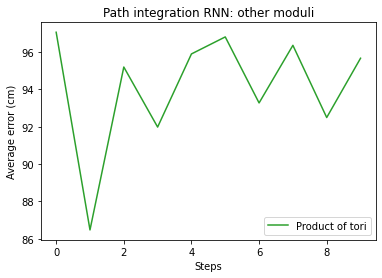

In [8]:
list_of_texts = ['_loss_sets.txt' for i in range(1,4)]
pathdatadict = {}
for i in range(len(list_of_texts)):
    pathdatadict[i] = pathdata(list_of_texts[i])
epochs=10

list_of_medians = []
list_of_first_qs = []
list_of_third_qs = []

for i in range(epochs):
    mydata = [x.dist[i] for x in pathdatadict.values()]
    median = np.median(mydata)
    firstq = np.percentile(mydata, 25)
    thirdq = np.percentile(mydata, 75)
    
    list_of_medians.append(median)
    list_of_first_qs.append(firstq)
    list_of_third_qs.append(thirdq)
    
fig = plt.figure()
bx = fig.add_subplot(1, 1, 1)
bx.plot(list(range(10)), list_of_medians, color='tab:green', label = 'Product of tori')
bx.fill_between(list(range(10)), list_of_first_qs, list_of_third_qs, alpha=.3, facecolor='tab:green')
bx.set_xlabel('Steps')
bx.set_ylabel('Average error (cm)')
bx.set_title('Path integration RNN: other moduli')



plt.legend()
plt.show()
plt.close()

87.86
0.766927


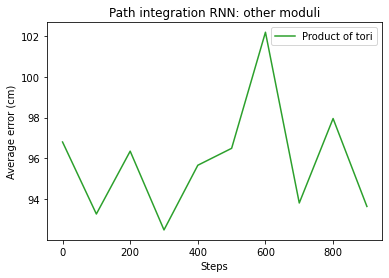

In [12]:
class summarydata(object):
    def __init__(self, files, epochs):
        self.files = files
        self.epochs = epochs
        self.steps = []
        self.firstqs = []
        self.meds = []
        self.thirdqs = []
        self.avgerror = 0
        self.avgsparsity = 0
        self.summary()
        
    def summary(self):
        pathdatadict = {}
        err = 0
        sparse = 0
        for i in range(len(self.files)):
            pathdatadict[i] = pathdata(self.files[i])
            err += pathdatadict[i].finalerr
            sparse += pathdatadict[i].finalspar
        self.avgerror = err/len(self.files)
        self.avgsparsity = sparse/len(self.files)
        for i in range(self.epochs):
            mydata = [x.dist[i] for x in pathdatadict.values()]
            firstq = np.percentile(mydata, 25)
            median = np.median(mydata)
            thirdq = np.percentile(mydata, 75)
            
            self.firstqs.append(firstq)
            self.meds.append(median)
            self.thirdqs.append(thirdq)
            self.steps.append(pathdatadict[0].epochs[i])
            
#
list_of_texts = ["_loss_sets.txt" for i in range(2)]
testsum = summarydata(list_of_texts, 10)

fig = plt.figure()
bx = fig.add_subplot(1, 1, 1)
bx.plot(testsum.steps, testsum.meds, color='tab:green', label = 'Product of tori')
bx.fill_between(testsum.steps, testsum.firstqs, testsum.thirdqs, alpha=.3, facecolor='tab:green')
bx.set_xlabel('Steps')
bx.set_ylabel('Average error (cm)')
bx.set_title('Path integration RNN: other moduli')

print(testsum.avgerror)
print(testsum.avgsparsity)
plt.legend()
plt.show()
plt.close()

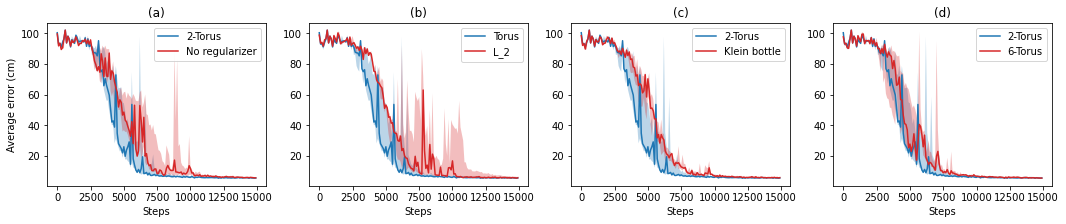

In [72]:
noreg_files = ['autkleinvvv' + str(i) + '.txt' for i in range(5)]
noreg = summarydata(noreg_files, 150)

torus_files = ['auttorvvvsma' + str(i) + '.txt' for i in range(5)]
torus = summarydata(torus_files, 150)

torus6_files = ['aut6vvv' + str(i) + '.txt' for i in range(5)]
torus6 = summarydata(torus6_files, 150)

nonoreg_files = ['noreg' + str(i) + '.txt' for i in range(5)]
nonoreg = summarydata(nonoreg_files, 150)

l2_files = ['l2_' + str(i) + '.txt' for i in range(5)]
l2 = summarydata(l2_files, 150)



fig, ax = plt.subplots(1, 4, figsize=(18,3))
ax[2].plot(torus.steps, torus.meds, color='tab:blue', label ='2-Torus')
ax[2].fill_between(torus.steps, torus.firstqs, torus.thirdqs, alpha=.3, facecolor='tab:blue')
ax[2].plot(noreg.steps, noreg.meds, color='tab:red', label ='Klein bottle')
ax[2].fill_between(noreg.steps, noreg.firstqs, noreg.thirdqs, alpha=.3, facecolor='tab:red')
ax[2].set_title('(c)')
ax[2].set_xlabel('Steps')
ax[2].legend()

ax[3].plot(torus.steps, torus.meds, color='tab:blue', label ='2-Torus')
ax[3].fill_between(torus.steps, torus.firstqs, torus.thirdqs, alpha=.3, facecolor='tab:blue')
ax[3].plot(torus6.steps, torus6.meds, color='tab:red', label ='6-Torus')
ax[3].fill_between(torus6.steps, torus6.firstqs, torus6.thirdqs, alpha=.3, facecolor='tab:red')
ax[3].set_title('(d)')
ax[3].set_xlabel('Steps')
ax[3].legend()
#ax[1].set_ylabel('Average error (cm)')

ax[0].plot(torus.steps, torus.meds, color='tab:blue', label ='2-Torus')
ax[0].fill_between(torus.steps, torus.firstqs, torus.thirdqs, alpha=.3, facecolor='tab:blue')
ax[0].plot(nonoreg.steps, nonoreg.meds, color='tab:red', label ='No regularizer')
ax[0].fill_between(nonoreg.steps, nonoreg.firstqs, nonoreg.thirdqs, alpha=.3, facecolor='tab:red')
ax[0].set_title('(a)')
ax[0].set_xlabel('Steps')
ax[0].legend()
ax[0].set_ylabel('Average error (cm)')

ax[1].plot(torus.steps, torus.meds, color='tab:blue', label ='Torus')
ax[1].fill_between(torus.steps, torus.firstqs, torus.thirdqs, alpha=.3, facecolor='tab:blue')
ax[1].plot(l2.steps, l2.meds, color='tab:red', label ='L_2')
ax[1].fill_between(l2.steps, l2.firstqs, l2.thirdqs, alpha=.3, facecolor='tab:red')
ax[1].set_title('(b)')
ax[1].set_xlabel('Steps')
ax[1].legend()
#ax[1].set_ylabel('Average error (cm)')


#plt.legend()
plt.show()
plt.close()

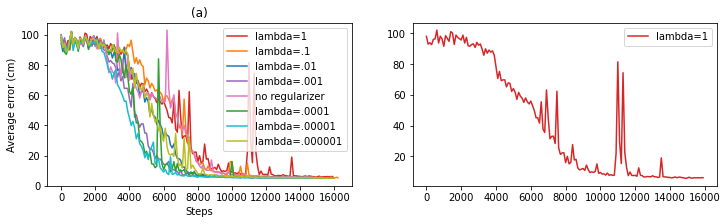

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(12,3))
big = pathdata('auttorbig.txt')
med = pathdata('auttorus2.txt')
sma = pathdata('auttorsmall0.txt')
vsma = pathdata('auttorvsma0.txt')
vvsma = pathdata('auttorvvsma0.txt')
vvvsma=pathdata('auttorvvvsma1.txt')
v4sma=pathdata('auttorv4sma0.txt')

none = pathdata('noreg0.txt')
ax[0].plot(big.epochs, big.dist, color='tab:red', label ='lambda=1')
ax[0].plot(med.epochs, med.dist, color='tab:orange', label ='lambda=.1')
ax[0].plot(sma.epochs, sma.dist, color='tab:blue', label ='lambda=.01')
ax[0].plot(vsma.epochs, vsma.dist, color='tab:purple', label ='lambda=.001')
ax[0].plot(none.epochs[:150], none.dist[:150], color='tab:pink', label ='no regularizer')
ax[0].plot(vvsma.epochs, vvsma.dist, color='tab:green', label ='lambda=.0001')
ax[0].plot(vvvsma.epochs, vvvsma.dist, color='tab:cyan', label='lambda=.00001')
ax[0].plot(v4sma.epochs, v4sma.dist, color='tab:olive', label='lambda=.000001')


ax[0].set_title('(a)')
ax[0].set_xlabel('Steps')
ax[0].set_ylabel('Average error (cm)')
ax[0].legend()

ax[1].plot(big.epochs, big.dist, color='tab:red', label ='lambda=1')

plt.legend()
plt.show()
plt.close()

In [24]:
class mintomax(object):
    def __init__(self, files, epochs):
        self.files = files
        self.epochs = epochs
        self.steps = []
        self.mins = []
        self.meds = []
        self.maxs = []
        self.summary()
        
    def summary(self):
        pathdatadict = {}
        for i in range(len(self.files)):
            pathdatadict[i] = pathdata(self.files[i])
        for i in range(self.epochs):
            mydata = [x.dist[i] for x in pathdatadict.values()]
            firstq = np.min(mydata)
            median = np.mean(mydata)
            thirdq = np.max(mydata)
            
            self.mins.append(firstq)
            self.meds.append(median)
            self.maxs.append(thirdq)
            self.steps.append(pathdatadict[0].epochs[i])

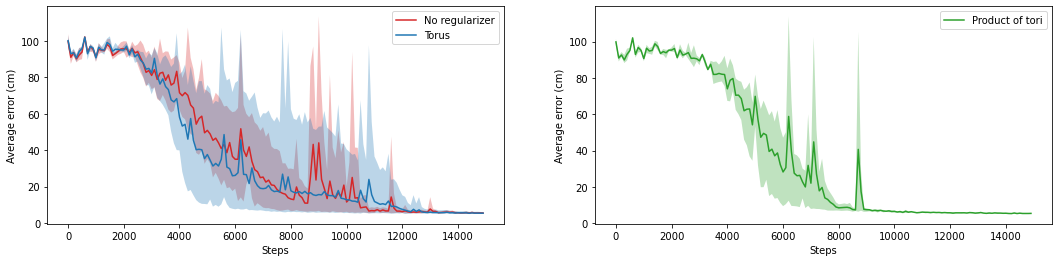

In [75]:
noreg_files = ['noreg' + str(i) + '.txt' for i in range(5)]
noreg = mintomax(noreg_files, 150)

torus_files = ['auttorvvvsma' + str(i) + '.txt' for i in range(5)]
torus = mintomax(torus_files, 150)
testsum = mintomax(list_of_texts, 150)



fig, ax = plt.subplots(1, 2, figsize=(18,4))
ax[0].plot(noreg.steps, noreg.meds, color='tab:red', label ='No regularizer')
ax[0].fill_between(noreg.steps, noreg.mins, noreg.maxs, alpha=.3, facecolor='tab:red')
ax[0].plot(torus.steps, torus.meds, color='tab:blue', label ='Torus')
ax[0].fill_between(torus.steps, torus.mins, torus.maxs, alpha=.3, facecolor='tab:blue')
ax[0].set_xlabel('Steps')
ax[0].set_ylabel('Average error (cm)')
ax[0].legend()

ax[1].plot(testsum.steps, testsum.meds, color='tab:green', label ='Product of tori')
ax[1].fill_between(testsum.steps, testsum.mins, testsum.maxs, alpha=.3, facecolor='tab:green')
ax[1].set_xlabel('Steps')
ax[1].set_ylabel('Average error (cm)')


plt.legend()
plt.show()
plt.close()

In [2]:
import torch 
def torus_distance(a, b, embed_dim):
    a = a.view(embed_dim, -1, 1)
    b = b.view(embed_dim, 1, -1)
    return torch.linalg.norm(torch.min(torch.remainder(a - b, 10), torch.remainder(b-a, 10)), dim=0)

def DoG(x):
    return 100*(torch.exp(-x**2/5) - torch.exp(-x**2))

def ripple(x):
    return 50 + 50*torch.cos(2*x)

def invert(a):
    a = np.max(a) - a
    return (a - np.min(a))/(np.max(a) - np.min(a))

In [3]:
M1 = torch.tensor([[1, 0, 10],
                           [ 0, -1, 10],
                           [ 0, 0, 1]], dtype=torch.float32)
M2 = torch.tensor(np.array([[1, 0, -10],
                           [ 0, -1, 10],
                           [ 0, 0, 1]]), dtype=torch.float32)
M3 = torch.tensor(np.array([[1, 0, 0],
                           [ 0, 1, 10],
                           [ 0, 0, 1]]), dtype=torch.float32)
M4 = torch.tensor(np.array([[1, 0, 0],
                           [ 0, 1, -10],
                           [ 0, 0, 1]]), dtype=torch.float32)

device = 'cpu'

M1 = M1.to(device)
M2 = M2.to(device)
M3 = M3.to(device)
M4 = M4.to(device)


def klein_distance(a, b):
    padder = torch.nn.ConstantPad1d((0, 1), 1)
    a = a.transpose(0, 1)
    b = b.transpose(0, 1)
    a = padder(a).transpose(0, 1)
    b = padder(b).transpose(0, 1)
    a = a.view(3, -1, 1)
    #b = b.view(3, 1, -1)
    return torch.min(torch.cat((torch.unsqueeze(torch.linalg.norm(a - b.view(3, 1, -1), dim = 0), 0),
                    torch.unsqueeze(torch.linalg.norm(a - torch.matmul(M1, b).view(3, 1, -1), dim=0), 0),
                    torch.unsqueeze(torch.linalg.norm(a - torch.matmul(M2, b).view(3, 1, -1), dim=0), 0),
                    torch.unsqueeze(torch.linalg.norm(a - torch.matmul(M3, b).view(3, 1, -1), dim=0), 0),
                    torch.unsqueeze(torch.linalg.norm(a - torch.matmul(M4, b).view(3, 1, -1), dim=0), 0),
                    torch.unsqueeze(torch.linalg.norm(a - torch.matmul(torch.matmul(M1, M3), b).view(3, 1, -1), dim=0), 0),
                    torch.unsqueeze(torch.linalg.norm(a - torch.matmul(torch.matmul(M1, M4), b).view(3, 1, -1), dim=0), 0),
                    torch.unsqueeze(torch.linalg.norm(a - torch.matmul(torch.matmul(M2, M3), b).view(3, 1, -1), dim=0), 0),
                    torch.unsqueeze(torch.linalg.norm(a - torch.matmul(torch.matmul(M2, M4), b).view(3, 1, -1), dim=0), 0))), dim=0)

Text(0.5, 1.0, 'Sinusoid on Klein bottle')

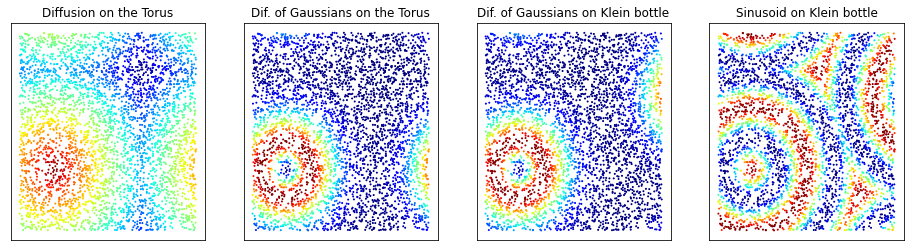

In [70]:
def sphere_distance(a, b):
    return 5 * torch.nan_to_num(torch.acos(torch.inner(a, b)))

n_pts = 4000
mypoint = torch.tensor([1.9, 3.1]).view(2,1)
mypoint2 = torch.tensor([1., 0., 0.]).view(1,3)
#mypoint = torch.tensor([7.9, 9.1]).view(2,1)
xys = 10*torch.rand(2, n_pts)
zs = torus_distance(mypoint, xys, 2)
ks, _ = klein_distance(mypoint, xys)
yzs = (torch.rand(n_pts, 3) - .5)
yzs = yzs/(torch.linalg.norm(yzs, dim=1, keepdim=True))
ss = sphere_distance(mypoint2, yzs)


n_xys = xys.numpy()

def tor_points(U, V):
    c = 1
    a = 1
    X = 2*(c+a*np.cos(V))*np.cos(U)
    Y = 2*(c+a*np.cos(V))*np.sin(U)
    Z = a*np.sin(V)
    return X, Y, Z

def klein_points(U, V):
    x = np.cos(U)*(np.cos(.5*U)*(np.sqrt(2) + np.cos(V)) + np.sin(.5*U)*np.sin(V)*np.cos(V))
    y = np.sin(U)*(np.cos(.5*U)*(np.sqrt(2) + np.cos(V)) + np.sin(.5*U)*np.sin(V)*np.cos(V))
    z = -np.sin(.5*U)*(np.sqrt(2) + np.cos(V)) + np.cos(.5*U)*np.sin(V)*np.cos(V)
    return x, y, z


bx = []
by = []
bz = []
cx = []
cy = []
cz = []
for i in range(n_pts):
    u, v = n_xys[:,i]*np.pi/5
    x, y, z = tor_points(v, u)
    bx.append(x)
    by.append(y)
    bz.append(z)
    x1, y1, z1 = klein_points(u, v)
    cx.append(x1)
    cy.append(y1)
    cz.append(z1)


fig, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].scatter(n_xys[0,:], n_xys[1,:], s = [1 for k in range(n_pts)], c=invert((zs).numpy()), cmap = 'jet')
ax[0].axes.get_xaxis().set_visible(False)
ax[0].axes.get_yaxis().set_visible(False)
ax[0].set_title('Diffusion on the Torus')

ax[1].scatter(n_xys[0,:], n_xys[1,:], s = [1 for k in range(n_pts)], c=DoG(zs).numpy(), cmap = 'jet')
ax[1].axes.get_xaxis().set_visible(False)
ax[1].axes.get_yaxis().set_visible(False)
ax[1].set_title('Dif. of Gaussians on the Torus')

ax[2].scatter(n_xys[0,:], n_xys[1,:], s = [1 for k in range(n_pts)], c=DoG(ks).numpy(), cmap = 'jet')
ax[2].axes.get_xaxis().set_visible(False)
ax[2].axes.get_yaxis().set_visible(False)
ax[2].set_title('Dif. of Gaussians on Klein bottle')

ax[3].scatter(n_xys[0,:], n_xys[1,:], s = [1 for k in range(n_pts)], c=ripple(ks).numpy(), cmap = 'jet')
ax[3].axes.get_xaxis().set_visible(False)
ax[3].axes.get_yaxis().set_visible(False)
ax[3].set_title('Sinusoid on Klein bottle')

In [54]:
x = torch.rand([2, 3]) - .5
y = x/torch.linalg.norm(x, dim=1, keepdim=True)
#print(torch.linalg.norm(y))
print(torch.linalg.norm(y, dim=1))

tensor([1., 1.])


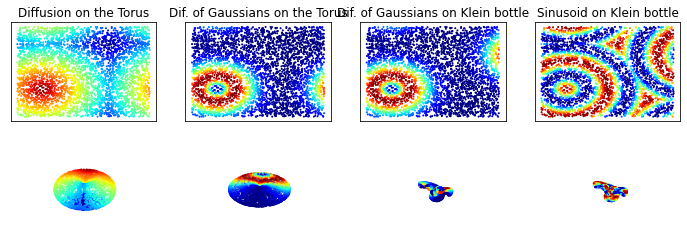

In [36]:
fig, ax = plt.subplots(2, 4, figsize=(12, 4))

ax[1, 0].remove()
ax[1, 1].remove()
ax[1, 2].remove()
ax[1, 3].remove()

ax[1, 0] = fig.add_subplot(2, 4, 5, projection='3d')
ax[1, 1] = fig.add_subplot(2, 4, 6, projection='3d')
ax[1, 2] = fig.add_subplot(2, 4, 7, projection='3d')
ax[1, 3] = fig.add_subplot(2, 4, 8, projection='3d')


ax[0, 0].scatter(n_xys[0,:], n_xys[1,:], s = [1 for k in range(n_pts)], c=invert((zs).numpy()), cmap = 'jet')
ax[0, 0].axes.get_xaxis().set_visible(False)
ax[0, 0].axes.get_yaxis().set_visible(False)
ax[0, 0].set_title('Diffusion on the Torus')

ax[0, 1].scatter(n_xys[0,:], n_xys[1,:], s = [1 for k in range(n_pts)], c=DoG(zs).numpy(), cmap = 'jet')
ax[0, 1].axes.get_xaxis().set_visible(False)
ax[0, 1].axes.get_yaxis().set_visible(False)
ax[0, 1].set_title('Dif. of Gaussians on the Torus')

ax[0, 2].scatter(n_xys[0,:], n_xys[1,:], s = [1 for k in range(n_pts)], c=DoG(ks).numpy(), cmap = 'jet')
ax[0, 2].axes.get_xaxis().set_visible(False)
ax[0, 2].axes.get_yaxis().set_visible(False)
ax[0, 2].set_title('Dif. of Gaussians on Klein bottle')

ax[0, 3].scatter(n_xys[0,:], n_xys[1,:], s = [1 for k in range(n_pts)], c=ripple(ks).numpy(), cmap = 'jet')
ax[0, 3].axes.get_xaxis().set_visible(False)
ax[0, 3].axes.get_yaxis().set_visible(False)
ax[0, 3].set_title('Sinusoid on Klein bottle')



ax[1, 0].scatter(bx, by, bz, s = 1, c=invert(zs.numpy()), cmap = 'jet')
ax[1, 0].set_zlim(-2, 2)
ax[1, 0].set_xlim(-4, 4)
ax[1, 0].set_ylim(-4, 4)
ax[1, 0].set_axis_off()
#ax[1, 0].set_title('Diffusion on the Torus')

ax[1, 1].scatter(bx, by, bz, s = [1 for k in range(n_pts)], c=DoG(zs).numpy(), cmap = 'jet')
ax[1, 1].set_zlim(-4, 4)
ax[1, 1].set_xlim(-4, 4)
ax[1, 1].set_ylim(-4, 4)
ax[1, 1].set_axis_off()
#ax[1, 1].set_title('Dif. of Gaussians on the Torus')

ax[1, 2].scatter(cx, cy, cz, s = [1 for k in range(n_pts)], c=DoG(ks).numpy(), cmap = 'jet')
ax[1, 2].set_zlim(-4, 4)
ax[1, 2].set_xlim(-4, 4)
ax[1, 2].set_ylim(-4, 4)
ax[1, 2].set_axis_off()
#ax[1, 2].set_title('Dif. of Gaussians on Klein bottle')

ax[1, 3].scatter(cx, cy, cz, s = [1 for k in range(n_pts)], c=ripple(ks).numpy(), cmap = 'jet')
ax[1, 3].set_zlim(-4, 4)
ax[1, 3].set_xlim(-4, 4)
ax[1, 3].set_ylim(-4, 4)
ax[1, 3].set_axis_off()
#ax[1, 3].set_title('Sinusoid on Klein bottle')

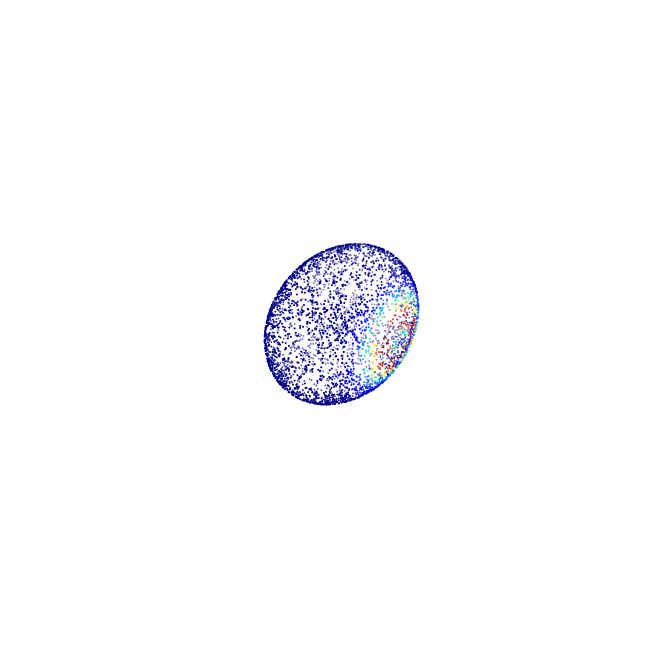

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.remove()
#my_zs = yzs[:,0].numpy() + yzs[:,1].numpy()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(yzs[:,0].numpy(), yzs[:,1], yzs[:,2].numpy(),  s = [1 for k in range(n_pts)], c=DoG(ss).numpy(), cmap = 'jet')
ax.set_zlim(-2, 2)
ax.set_xlim(-3, 3)
ax.set_ylim(-2, 2)
ax.set_axis_off()

/tmp/ipykernel_3527312/1185491042.py:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


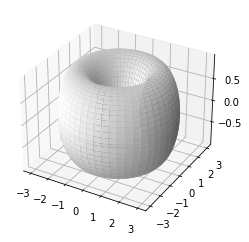

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def plot_torus(precision, c, a):
    U = np.linspace(0, 2*np.pi, precision)
    V = np.linspace(0, 2*np.pi, precision)
    U, V = np.meshgrid(U, V)
    X = (c+a*np.cos(V))*np.cos(U)
    Y = (c+a*np.cos(V))*np.sin(U)
    Z = a*np.sin(V)
    return X, Y, Z


x, y, z = plot_torus(100, 2, 1)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(x, y, z, antialiased=True, color='white')
plt.show()

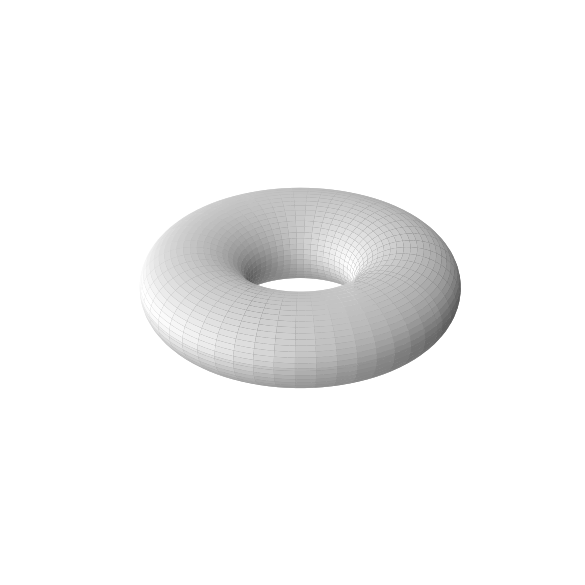

In [14]:
import numpy as np
import matplotlib.pyplot as plt


def plot_torus(precision, c, a):
    U = np.linspace(0, 2*np.pi, precision)
    V = np.linspace(0, 2*np.pi, precision)
    U, V = np.meshgrid(U, V)
    X = 2*(c+a*np.cos(V))*np.cos(U)
    Y = 2*(c+a*np.cos(V))*np.sin(U)
    Z = a*np.sin(V)
    return X, Y, Z


x, y, z = plot_torus(100, 2, 1)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z, antialiased=True, color='white')
fig.set_size_inches(18.5, 10.5)
ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])
ax.set_zlim(-3, 3)
ax.set_axis_off()

plt.show()

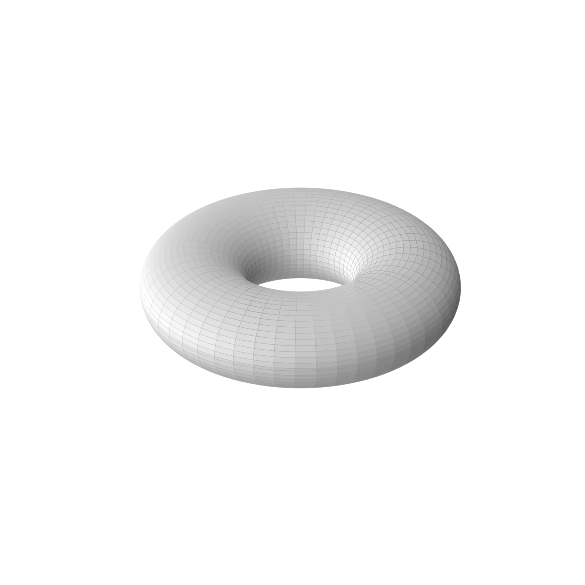

In [176]:
import numpy as np
import matplotlib.pyplot as plt


def plot_torus(precision, c, a):
    U = np.linspace(0, 2*np.pi, precision)
    V = np.linspace(0, 2*np.pi, precision)
    U, V = np.meshgrid(U, V)
    X = 2*(c+a*np.cos(V))*np.cos(U)
    Y = 2*(c+a*np.cos(V))*np.sin(U)
    Z = a*np.sin(V)
    return X, Y, Z

def tor_pos(U, V):
    c = 2
    a = 1
    X = 2*(c+a*np.cos(V))*np.cos(U)
    Y = 2*(c+a*np.cos(V))*np.sin(U)
    Z = a*np.sin(V)
    return [[X, Y, Z]]*3


def add_arrows(ax, x, y, z, arrow_origins, arrow_destinations):
    for origin, destination in zip(arrow_origins, arrow_destinations):
        ax.quiver(origin[0], origin[1], origin[2], 
                  #destination[0] - origin[0], destination[1] - origin[1], destination[2] - origin[2], 
                  destination[0], destination[1], destination[2], 
                  length=0.2, color='red')


x, y, z = plot_torus(100, 2, 1)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z, antialiased=True, color='white')
fig.set_size_inches(18.5, 10.5)
ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])
ax.set_zlim(-3, 3)
ax.set_axis_off()


alpha = 1.0
length = .25
u, v = 5, 80

for j in range(-20, 20):
    for k in range(-20, 20):
        l = np.sqrt(j**2+k**2)
        ax.quiver(x[u][v], y[u][v], z[u][v], x[u+j][v+k] - x[u][v], y[u+j][v+k] - y[u][v], z[u+j][v+k]-z[u][v], color='red', alpha=alpha, length=length)

#for u in range(0, 10):
#    for v in range(70, 100):
#        ax.quiver(x[u][v], y[u][v], z[u][v], 0, 3, 3, color='red', alpha=alpha, length=length)

plt.show()


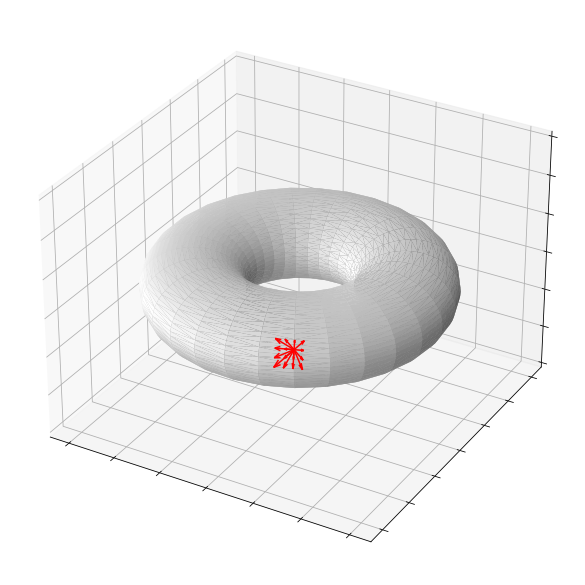

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

fig = plt.figure(figsize=plt.figaspect(1.0) * 1.7)

# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=30)    # u: theta
v = np.linspace(0, 2.0 * np.pi, endpoint=True, num=60)    # v: phi
u, v = np.meshgrid(u, v)

u, v = u.flatten(), v.flatten()

def F(U,V):
    c = 2
    a = 1
    X = 2*(c+a*np.cos(V))*np.cos(U)
    Y = 2*(c+a*np.cos(V))*np.sin(U)
    Z = a*np.sin(V)
    return X, Y, Z

x, y, z = F(u, v)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, color='white', alpha = 1.0)
#xl = ax.get_xlim()
#yl = ax.get_ylim()
fig.set_size_inches(18.5, 10.5)
ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])
ax.set_zlim(-3, 3)
#ax.set_axis_off()




alpha = 1.0
length = .25
u, v = 144, 90
xf, yf, zf = x[u], y[u], z[u]
ox, oy, oz = x[u+1], y[u+1], z[u+1]
for j in range(-2, 2):
    for k in range(-2, 2):
        l = np.sqrt(j**2+k**2)
        ax.quiver(x[u], y[u], z[u], 1.3*j+.1*k, .5*j, k, color='red', alpha=alpha, length=length)



plt.show()

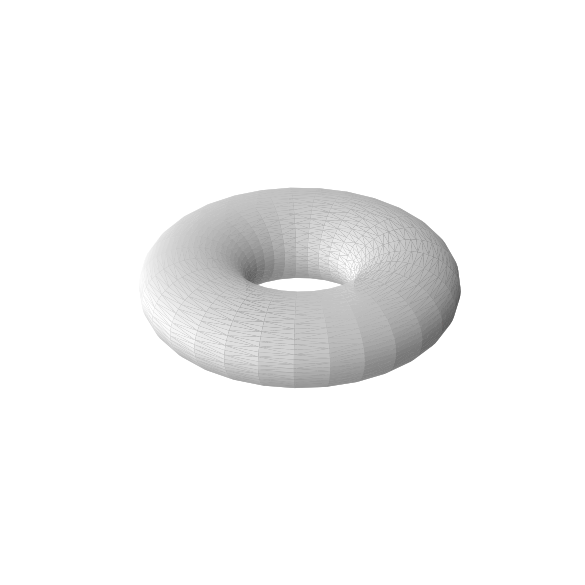

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

fig = plt.figure(figsize=plt.figaspect(1.0) * 1.7)

# Make a mesh in the space of parameterization variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=30)    # u: theta
v = np.linspace(0, 2.0 * np.pi, endpoint=True, num=60)    # v: phi
u, v = np.meshgrid(u, v)

u, v = u.flatten(), v.flatten()

def F(U, V):
    c = 2
    a = 1
    X = 2 * (c + a * np.cos(V)) * np.cos(U)
    Y = 2 * (c + a * np.cos(V)) * np.sin(U)
    Z = a * np.sin(V)
    return X, Y, Z

x, y, z = F(u, v)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, color='white', alpha=1.0)

# Function to draw a 3D arrow
class Arrow3D:
    def __init__(self, ax, xyz, uvw, arrowstyle="-|>", **kwargs):
        self.ax = ax
        self.xyz = xyz
        self.uvw = uvw
        self.arrowstyle = arrowstyle
        self.kwargs = kwargs
    
    def draw(self):
        x, y, z = self.xyz
        u, v, w = self.uvw
        self.ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.1, **self.kwargs)

# Add an arrow from one point on the torus to another
# For example, from the first point to the last point
arrow = Arrow3D(ax, xyz=(x[-1], y[-1], z[-1]), uvw=(x[0]-x[-1], y[0]-y[-1], z[0]-z[-1]), color='red')
arrow.draw()

arrow2 = Arrow3D(ax, xyz=(x[30], y[30], z[30]), uvw=(x[0]-x[30], y[0]-y[30], z[0]-z[30]), color='red')
arrow2.draw()




fig.set_size_inches(18.5, 10.5)
ax.set(xticklabels=[], yticklabels=[], zticklabels=[])
ax.set_zlim(-3, 3)
ax.set_axis_off()

plt.show()
